## Checking PacBio coverage

We have an issue in our Y assembly whereby a chunk of genes on the Chr12 X is simply missing from the Y assembly.

We have checked the rest of the assembly, and we cannot find any other scaffolds with alignments to this region. 

However, in the illumina data it this region seems to have 2n coverage, as in the rest of Chr12, suggesting that this region does exist on the Y. Additionally, M vs F Fst in this region is lower than much of the rest of Chr12. 

So here we want to double check that there is 2n coverage in the PacBio data in this region. To do this, we have aligned all the PacBio reads back against the X assembly. If there are Y reads, we should see 2n coverage.


### DeepTools

after mapping the PB data back to the X assembly, we ran deeptools to generate normalised depth (RPKM) across the chromosome. I plot this below for all the chromosomes. 

In [4]:
DT_path = "/Users/dj20y461/Downloads/Gw_allPBreads_autosX_deeptools.1kb.RPKM.depth"

scaff_dict = {}

with open(DT_path) as depths:
    for line in depths:
        scaff = line.split()[0]
        centre = int(line.split()[1]) + 500
        depth = float(line.split()[3])
        
        if "chr" in scaff:
            
            if scaff not in scaff_dict:
                scaff_dict[scaff] = {}
                scaff_dict[scaff]["centre"] = []
                scaff_dict[scaff]["depth"] = []
            
            scaff_dict[scaff]["centre"].append(centre)
            scaff_dict[scaff]["depth"].append(depth)
    

In [17]:
scaff_dict[scaff]["depth"]

[12.2579,
 14.0518,
 13.6033,
 14.6497,
 12.8559,
 11.5105,
 10.9125,
 11.062,
 11.959,
 12.2579,
 12.5569,
 12.7064,
 13.4538,
 13.9023,
 14.9487,
 14.2013,
 14.5002,
 14.7992,
 15.5466,
 15.0982,
 19.1343,
 18.9848,
 20.6292,
 38.8666,
 39.913,
 40.212,
 42.9028,
 24.6653,
 25.7118,
 23.021,
 19.8818,
 15.8456,
 15.2477,
 16.1446,
 17.7889,
 19.1343,
 18.6859,
 18.0879,
 16.1446,
 17.49,
 18.3869,
 18.0879,
 20.6292,
 20.3302,
 18.2374,
 17.7889,
 16.5931,
 16.4436,
 16.7425,
 15.6961,
 14.9487,
 15.6961,
 15.5466,
 15.8456,
 17.49,
 18.6859,
 17.3405,
 18.0879,
 29.5984,
 27.8046,
 13.3043,
 12.5569,
 12.8559,
 12.2579,
 13.4538,
 14.7992,
 13.9023,
 11.959,
 12.1084,
 12.7064,
 13.7528,
 14.7992,
 13.4538,
 12.2579,
 13.0054,
 13.9023,
 15.6961,
 17.7889,
 17.191,
 16.4436,
 17.7889,
 18.6859,
 17.9384,
 18.0879,
 18.9848,
 19.7323,
 19.5828,
 18.8354,
 23.4695,
 23.1705,
 22.8715,
 24.3664,
 24.0674,
 23.1705,
 20.9282,
 20.1807,
 19.7323,
 21.5261,
 18.6859,
 18.2374,
 17.9384,
 

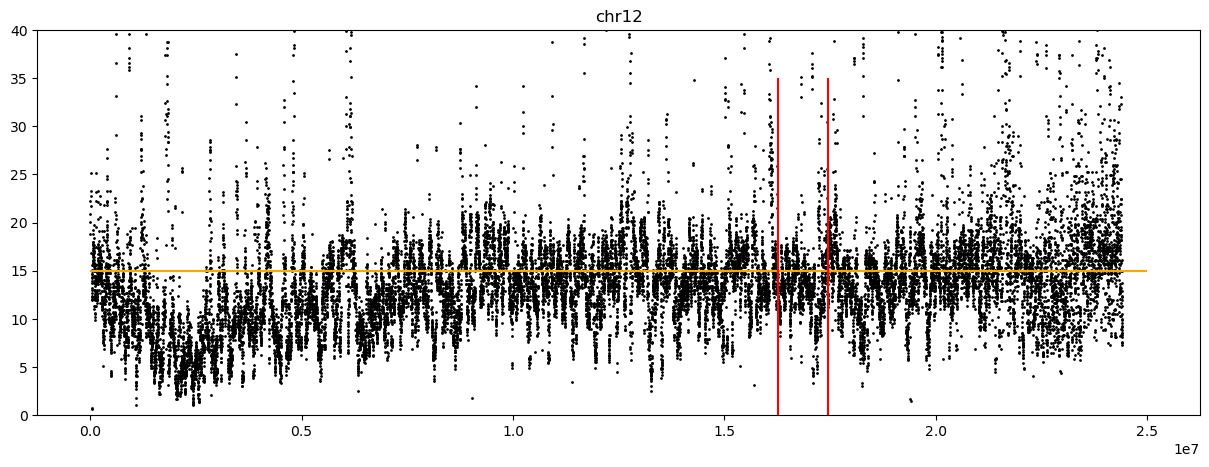

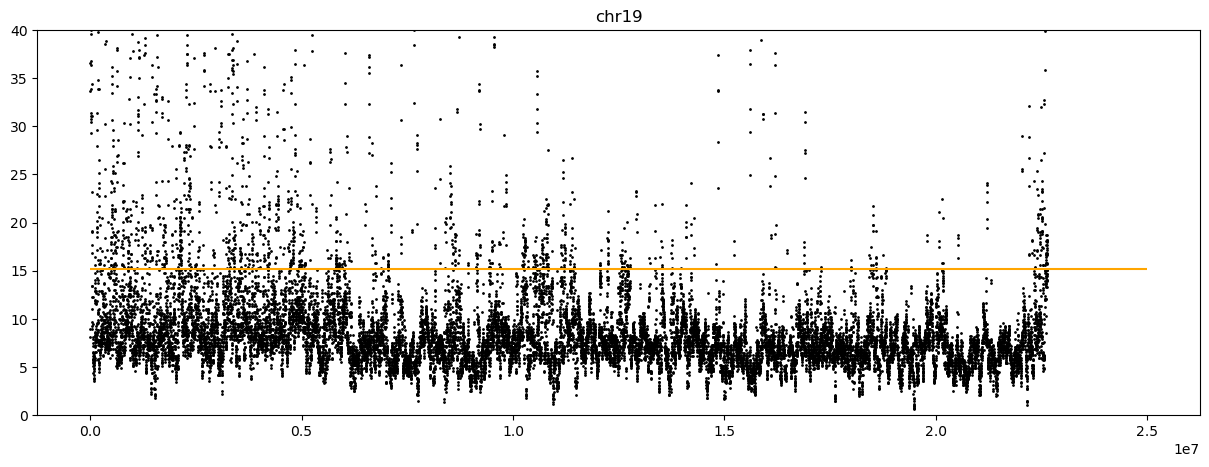

In [32]:
from matplotlib import pyplot as plt
import numpy as np

for_average = []

for scaff in scaff_dict:
    
    if scaff not in ["chr19", "chr12"]:
        
        for i in scaff_dict[scaff]["depth"]:
            for_average.append(i)
                
    auto_average = np.mean(for_average)
    
    if scaff in ["chr19", "chr12"]:

        plt.figure(figsize = (15,5))
        plt.scatter(scaff_dict[scaff]["centre"], scaff_dict[scaff]["depth"], 
                    s = 1,
                    color = "black")

        plt.hlines(auto_average, 0, 25000000, color = "orange")
        
        if scaff == "chr12":
            plt.vlines(16275000, 0, 35, color = "red")
            plt.vlines(17460000, 0, 35, color = "red")
        
        plt.title(scaff)
        plt.ylim(0,40)
        plt.show()
    

Ok, so there is no obvious reduction in coverage around the region where we are lacking gene synteny between the X and Y. So now I want to look for what the coverage in the Y reads only looks like. This will tell us whether the SRY step is efficiently pulling out reads in this region. 

In [33]:
DT_path = "/Users/dj20y461/Downloads/Gw_Yreads_against_autosX_deeptools.1kb.RPKM.depth"

scaff_dict = {}

with open(DT_path) as depths:
    for line in depths:
        scaff = line.split()[0]
        centre = int(line.split()[1]) + 500
        depth = float(line.split()[3])
        
        if "chr" in scaff:
            
            if scaff not in scaff_dict:
                scaff_dict[scaff] = {}
                scaff_dict[scaff]["centre"] = []
                scaff_dict[scaff]["depth"] = []
            
            scaff_dict[scaff]["centre"].append(centre)
            scaff_dict[scaff]["depth"].append(depth)
    

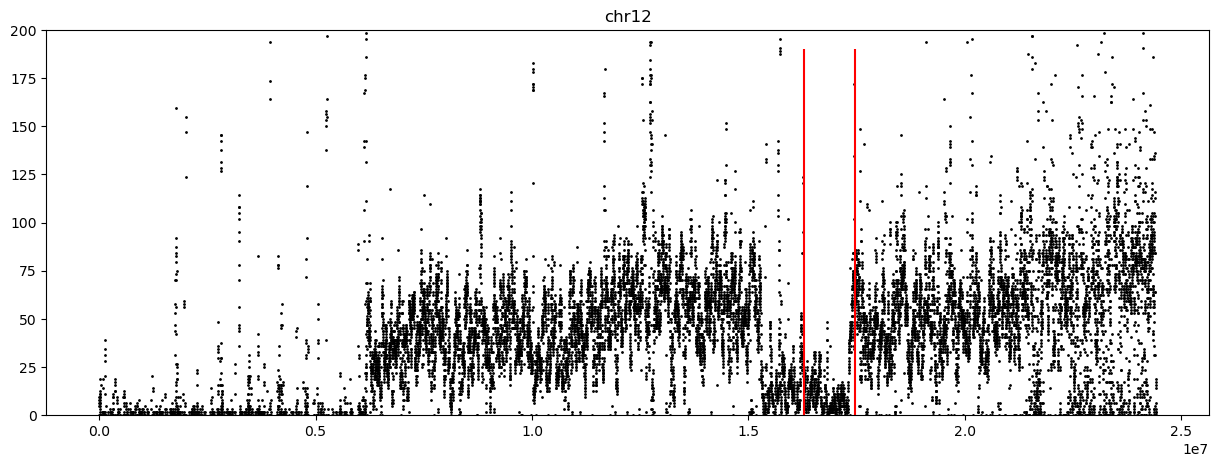

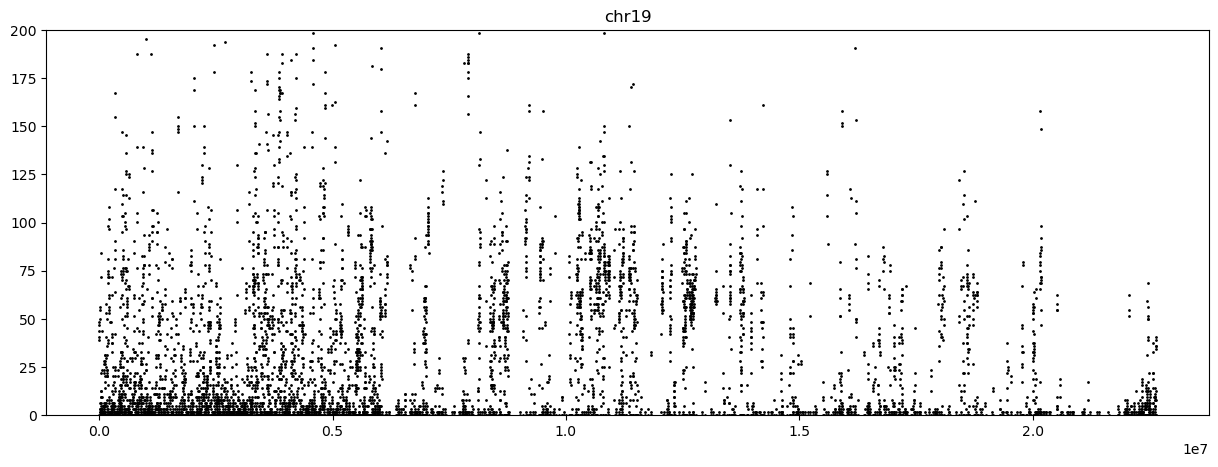

In [39]:
from matplotlib import pyplot as plt
import numpy as np

for_average = []

for scaff in scaff_dict:
    
    if scaff not in ["chr19", "chr12"]:
        
        for i in scaff_dict[scaff]["depth"]:
            for_average.append(i)
                
    auto_average = np.mean(for_average)
    
    if scaff in ["chr19", "chr12"]:

        plt.figure(figsize = (15,5))
        plt.scatter(scaff_dict[scaff]["centre"], scaff_dict[scaff]["depth"], 
                    s = 1,
                    color = "black")

        #plt.hlines(auto_average, 0, 25000000, color = "orange")
        
        if scaff == "chr12":
            plt.vlines(16275000, 0, 190, color = "red")
            plt.vlines(17460000, 0, 190, color = "red")
        
        plt.title(scaff)
        plt.ylim(0,200)
        plt.show()
    

Ahah! There is a clear reduction in read coverage in the Y reads here. So this is an important clue as to what is happening. We already know that this region is low Fst. Now we know that SRY pulls out very few reads in this region. This would explain why we had trouble assembling it. 

The region of low SRY reads is larger than the region that is missing, but we can see from the HiC contact maps that the left hand side of this region is made up of several very short contigs, much shorter than contigs from the rest of the chromosome. 

To me, this supports the theory that SRY failed to pull out adequate reads to assemble this region, which is why we miss it. This raises several questions however. 

1) WHY is this region so undifferentiated, while it is flanked by differentiated regions? This is inconsistent with the stair like pattern that we expect during the expansion of recombination loss on sex chromosomes. Is it real? If yes, it could represent some resuming of recombination after recombination loss initially occurred.

2) What do we do now? Do we try to reassemble - with specific attempts to pull out the SRY reads for this region? Or do we continue with the incomplete assembly, given that we now have an explanation for why it is incomplete? 


## Checking SRY thresholds 

In [58]:
snpden_path = "/Users/dj20y461/Data_temp/Stickleback/Y_comp/SRY_tests/SNPdensity_test/SNPs_densityPerKb2.snpden" 

In [59]:
with open(snpden_path) as snpden:
    
    next(snpden)
    
    pos = []
    dens = []
    
    for line in snpden:
        
        pos.append(int(line.split()[1]))
        dens.append(int(line.split()[2]))
    

In [60]:
import pandas as pd

dens_df = pd.DataFrame(dens)

In [70]:
rolling_dens = dens_df.rolling(100,8).mean()

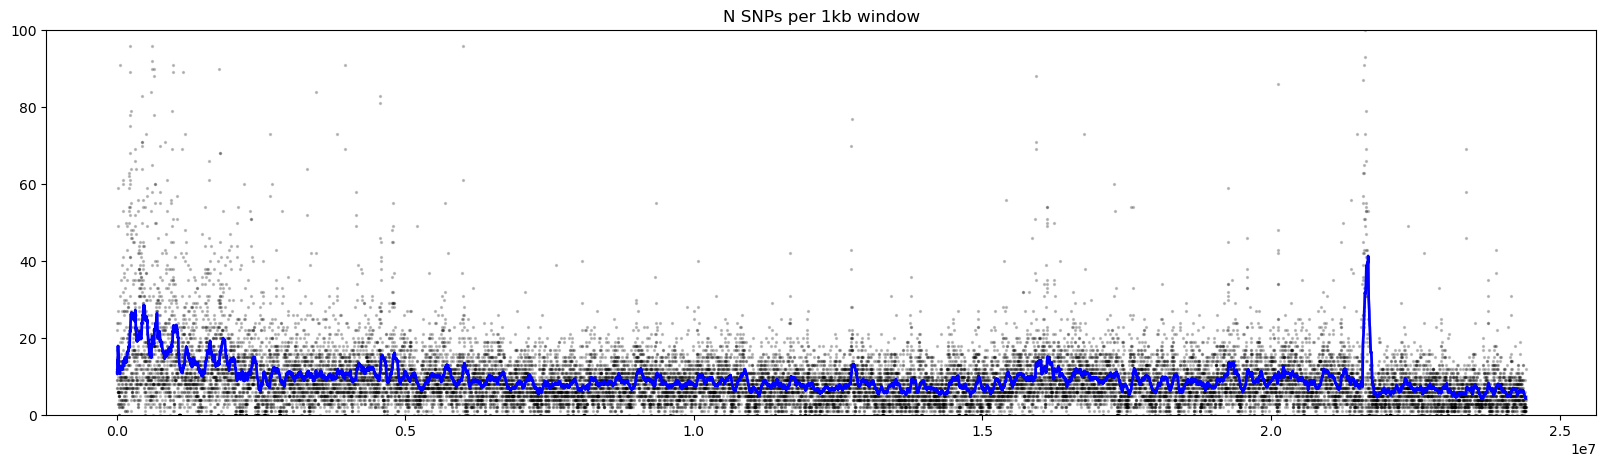

In [75]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,5))
plt.scatter(pos, dens, s = 2, color = "black", alpha = 0.2)
plt.plot(pos, rolling_dens, color = "blue", linewidth = 2)
#plt.xlim(13000000,20000000)
plt.ylim(0,100)
plt.title("N SNPs per 1kb window")
plt.show()